# Binary Classification for Tabular Kidney Stone Dataset with Logistic Regression

Kidney stones (also called renal calculi, nephrolithiasis or urolithiasis) are hard deposits made of minerals and salts that form inside your kidneys. Diet, excess body weight, some medical conditions, and certain supplements and medications are among the many causes of kidney stones.

Binary classification with tabular kidney stone prediction using logistic regression is a valuable tool in the field of healthcare. It empowers healthcare providers with data-driven insights to identify patients at risk, enabling early intervention and improved patient care in the prevention of kidney stones. This approach enhances the efficiency of healthcare delivery and contributes to better patient outcomes.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from keras.layers import Dense, Dropout, LSTM, BatchNormalization, Bidirectional
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
import tensorflow

## Load Dataset

In [ ]:
df = pd.read_csv('/content/train_kidney.csv')
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


## Learn more about the data

In [ ]:
df.shape

(414, 8)

In [ ]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

The 79 urine specimens, were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals. The six physical characteristics of the urine are:

1. specific gravity, the density of the urine relative to water;
2. pH, the negative logarithm of the hydrogen ion;
3. osmolarity (mOsm), a unit used in biology and medicine but not in physical 4. chemistry. Osmolarity is proportional to the concentration of molecules in solution;
5. conductivity (mMho milliMho). One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution;
6. Urea concentration in millimoles per litre;
7. calcium concentration (CALC) in millimolesllitre.

In [ ]:
df.head(10)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
5,5,1.025,6.90,947,28.4,395,2.64,1
6,6,1.008,5.09,371,15.5,159,2.17,1
7,7,1.015,5.53,450,8.1,170,1.16,0
8,8,1.025,7.38,736,25.3,418,1.52,0
9,9,1.017,6.61,527,20.0,75,4.49,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
describe_data = df.iloc[:,1:6]
describe_data.describe()

,gravity,ph,osmo,cond,urea
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005
std,0.006675,0.642260,234.676567,7.514750,136.442249
min,1.005000,4.760000,187.000000,5.100000,10.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000


## Data Preprocessing

### Checking Missing Values

In [ ]:
df.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

### Checking Duplicate Data

In [ ]:
df.loc[df.duplicated(subset=['id'])].count()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

### Checking The Distributin of The Data

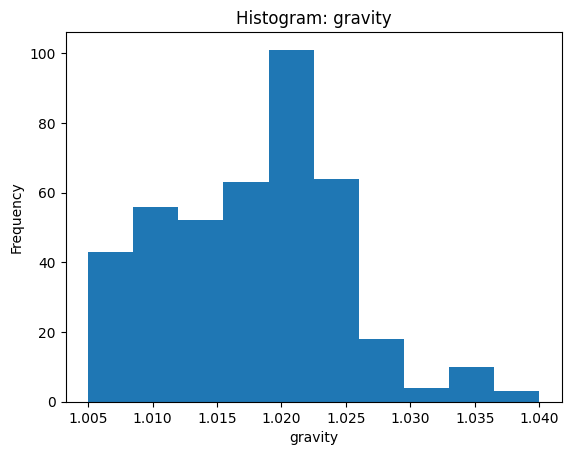

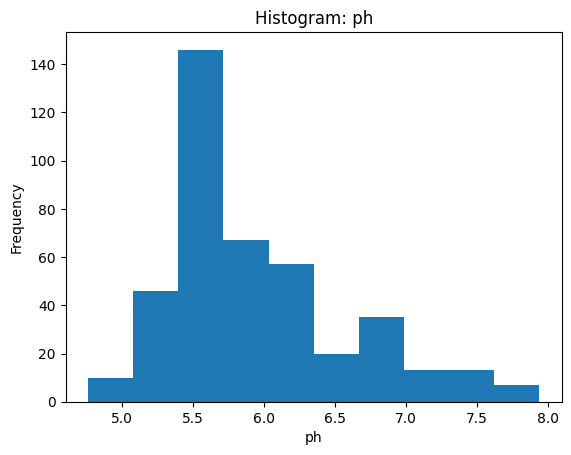

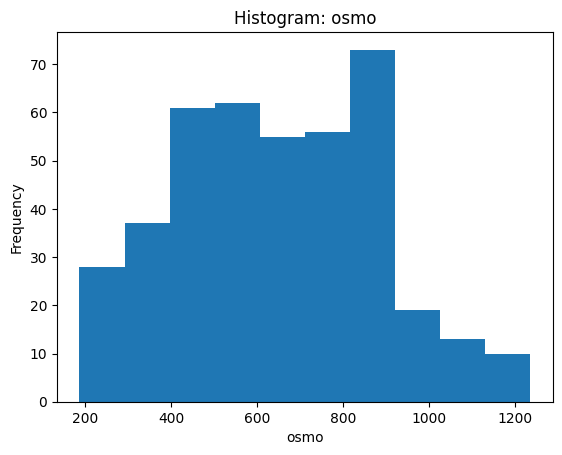

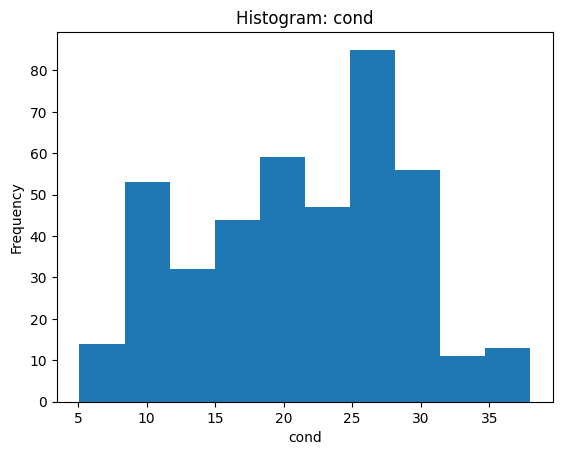

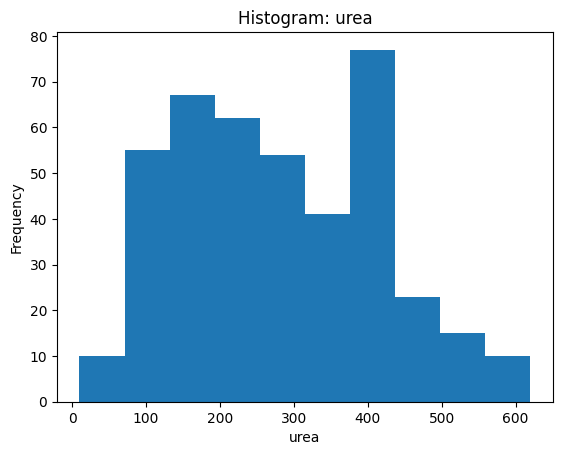

In [ ]:
df_test = df.iloc[:,1:6]
for column in df_test:
    plt.figure()
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram: ' + column)
    plt.show()

### Checking Outliers

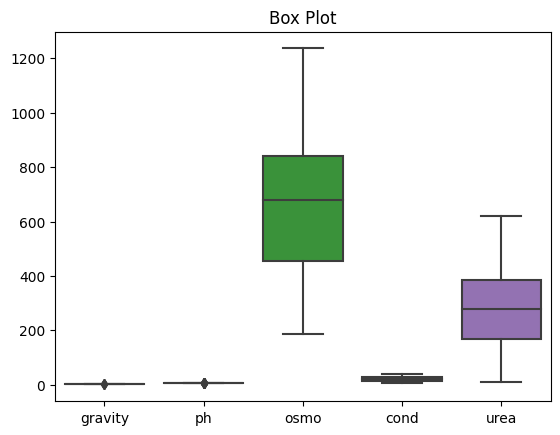

In [ ]:
df_test = df.iloc[:,1:6]
plt.figure()
sns.boxplot(data=df_test, orient="v")
plt.title('Box Plot')
plt.show()

### Removing The Outliers

In [ ]:
print('Old Shape: ', df.shape)

Old Shape:  (414, 8)


In [ ]:
# IQR
# Calculate the upper and lower limits
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df>=upper)[0]
lower_array = np.where(df<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


New Shape:  (399, 8)


### Checking Imbalance Data

In [ ]:
cek_imbalance = df.iloc[:, -1]
cek_imbalance.value_counts().plot.pie(autopct='%.2f')
plt.show()

NameError: ignored

In [ ]:
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


## Feuture Relationship

### Pariplot

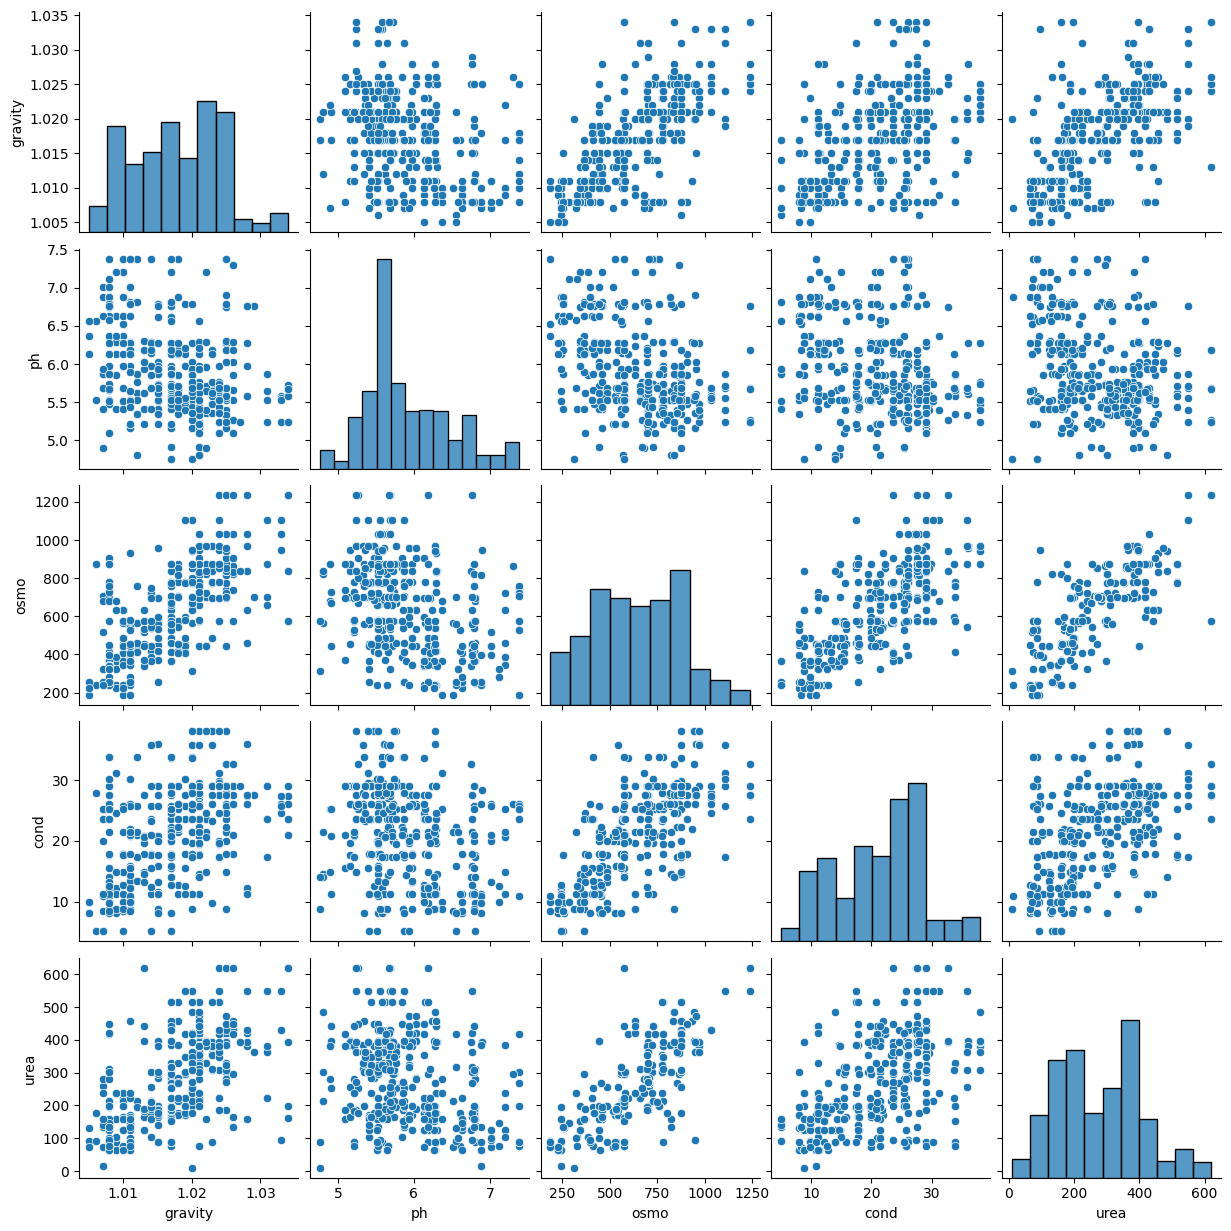

In [ ]:
df_test = df.iloc[:,1:6]
sns.pairplot(df_test)
plt.show()

### Heatmap

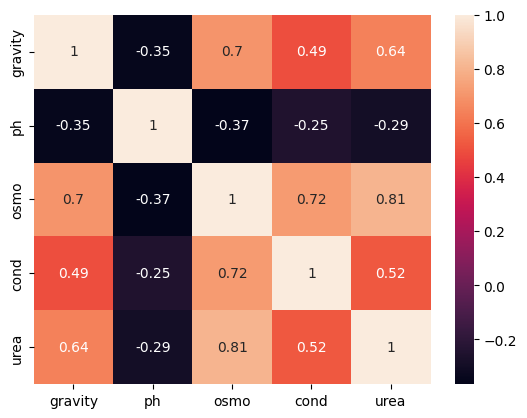

In [ ]:
corr = df_test.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
df=df.drop(columns='ph',axis=1)
df.head()

,id,gravity,osmo,cond,urea,calc,target
0,0,1.013,443,14.8,124,1.45,0
1,1,1.025,703,23.6,394,4.18,0
2,2,1.009,371,24.5,159,9.04,0
3,3,1.021,442,20.8,398,6.63,1
4,4,1.021,874,17.8,385,2.21,1


## Split & Scale The Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=df.drop(columns='id',axis=1)
df.head()

,gravity,osmo,cond,urea,calc,target
0,1.013,443,14.8,124,1.45,0
1,1.025,703,23.6,394,4.18,0
2,1.009,371,24.5,159,9.04,0
3,1.021,442,20.8,398,6.63,1
4,1.021,874,17.8,385,2.21,1


In [ ]:
x = df.iloc[:,0:5]# splitting the variables from the target
y = df.iloc[:, -1]# separating target from other variables

In [ ]:
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [ ]:
x.head()

,gravity,osmo,cond,urea,calc
0,0.275862,0.244042,0.294833,0.186885,0.090332
1,0.689655,0.491897,0.562310,0.629508,0.282992
2,0.137931,0.175405,0.589666,0.244262,0.625970
3,0.551724,0.243089,0.477204,0.636066,0.455893
4,0.551724,0.654909,0.386018,0.614754,0.143966


Scaling with MinMaxScaler can help ensure that all the features in your dataset are on the same scale. This is crucial in machine learning, especially when you have features with different units or ranges of values. In the context of a kidney stone dataset, you likely have various attributes (e.g., size, location, patient age) that may have different numerical ranges. Scaling these features to a common range, typically between 0 and 1, ensures that no single feature dominates the learning process or introduces bias due to its scale.

In summary, scaling your kidney stone dataset with MinMaxScaler can improve the performance and stability of machine learning models by ensuring that all features contribute equally to the learning process, regardless of their original scale.

In [ ]:
x_train ,x_test , y_train ,y_test = train_test_split(x, y, train_size= 0.60, random_state=1)

In [ ]:
print(f"shape of 'x_train': {x_train.shape}")
print(f"shape of 'x_test': {x_test.shape}")
print(f"shape of 'y_train': {y_train.shape}")
print(f"shape of 'y_test': {y_test.shape}")

shape of 'x_train': (239, 5)
shape of 'x_test': (160, 5)
shape of 'y_train': (239,)
shape of 'y_test': (160,)


## Making Model with Logistics Regression

I will create a model using Logistic Regression, where there will be two Logistic Regression models. The first one is a Logistic Regression model that does not use GridSearchCV, and the second one is a Logistic Regression model that uses GridSearchCV. GridSearchCV is a technique used in machine learning for hyperparameter tuning.

With GridSearchCV, i hope will have a better result than using a regular Logistic Regression. Because, GridSearchCV using a method for systematically searching and selecting the best combination of hyperparameters for a machine learning model by evaluating the model's performance on different combinations of hyperparameters using cross-validation.

### 1. Logistic Regression's model with no GridSearchCV

In [ ]:
model_logistic = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
model_logistic.fit(x_train , y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
predicted_logistic = model_logistic.predict(x_test)

In [ ]:
con_logreg = confusion_matrix(y_test, predicted_logistic)

In [ ]:
acc_logreg = accuracy_score(y_test, predicted_logistic)
prec_score = precision_score(y_test, predicted_logistic)
rec_logreg = recall_score(y_test, predicted_logistic)
f_logreg = f1_score(y_test, predicted_logistic)

In [ ]:
roc_auc_logreg =  roc_auc_score(y_test, predicted_logistic)

### 2. Logistic Regression's model with GridSearchCV

In [ ]:
param_grid_lr = {
'max_iter': [20, 50, 100, 200, 500, 1000,10000,100000],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'class_weight': ['balanced'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength values
'penalty': ['l1', 'l2']  # Regularization type
}

In [ ]:
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234),scoring ='accuracy', param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(x_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
LogisticRegression(C=10, class_weight='balanced', max_iter=20, penalty='l1',
                   random_state=1234, solver='saga')


In [ ]:
y_pred_grid = logModel_grid.predict(x_test)

In [ ]:
con_grid = confusion_matrix(y_test, y_pred_grid)

In [ ]:
acc_grid = accuracy_score(y_test, y_pred_grid)
prec_grid = precision_score(y_test, y_pred_grid)
rec_grid = recall_score(y_test, y_pred_grid)
f_grid = f1_score(y_test, y_pred_grid)

In [ ]:
roc_auc_grid =  roc_auc_score(y_test, y_pred_grid)

## Review Logistic Regression's model with no GridSearchCV and Logistic Regression's model with GridSearchCV

In [ ]:
print("1. Confusion Matrix Logistic Regression's model with no GridSearchCV: ")
print(con_logreg)
print('')
print("2. Confusion Matrix Logistic Regression's model with GridSearchCV: ")
print(con_grid)

1. Confusion Matrix Logistic Regression's model with no GridSearchCV: 
[[82  5]
 [35 38]]

2. Confusion Matrix Logistic Regression's model with GridSearchCV: 
[[79  8]
 [25 48]]


1. Logistics Regression's model with no GridSearchCV: The model correctly predicted 82 instances of class 0, 38 instances of class 1. It has 5 false positive and 35 false negative.
2. Logistic Regression's model with GridSearchCV: The model correctly predicted 79 instances of class 0, 48 instances of class 1. It has 8 false positive and 25 false negative.

In [ ]:
print("1. Accuracy, precision, recall, f1 score for Logistic Regression's model with no GridSearchCV: ")
print("   - Accuracy's score: ",acc_logreg)
print("   - Precision's score: ",prec_score)
print("   - Recall's score: ",rec_logreg)
print("   - F1's score: ",f_logreg)
print("")
print("2. Accuracy, precision, recall, f1 score for Logistic Regression's model with GridSearchCV: ")
print("   - Accuracy's score: ",acc_grid)
print("   - Precision's score: ",prec_grid)
print("   - Recall's score: ",rec_grid)
print("   - F1's score: ",f_grid)

1. Accuracy, precision, recall, f1 score for Logistic Regression's model with no GridSearchCV: 
   - Accuracy's score:  0.75
   - Precision's score:  0.8837209302325582
   - Recall's score:  0.5205479452054794
   - F1's score:  0.6551724137931034

2. Accuracy, precision, recall, f1 score for Logistic Regression's model with GridSearchCV: 
   - Accuracy's score:  0.79375
   - Precision's score:  0.8571428571428571
   - Recall's score:  0.6575342465753424
   - F1's score:  0.7441860465116279


1. Logistic Regression's model with no GridSearchCV achieved an accuracy of 0.75, indicating that it performs reasonably well in predicting the target variable.
2. Logistic Regression's model with GridSearchCV achieved an accuracy of 0.79375, it demonstrates satisfactory performance in forecasting the desired outcome.

Logistic regression model with GridSearchCV performed slightly better than the model without GridSearchCV. This is because the GridSearchCV model was able to find the optimal hyperparameters for the model, which resulted in a better performance.

In [ ]:
print("1. ROC and AUC score for Logistic Regression's model with no GridSearchCV: ")
print(roc_auc_logreg)
print("")
print("1. ROC and AUC score for Logistic Regression's model with GridSearchCV: ")
print(roc_auc_grid)

1. ROC and AUC score for Logistic Regression's model with no GridSearchCV: 
0.7315383404188316

1. ROC and AUC score for Logistic Regression's model with GridSearchCV: 
0.7827901117934183


1. Logistic Regression's model with no GridSearchCV has an ROC AUC score of 0.7315, which is slightly above the random model. This means that the model is able to distinguish between the two classes to some extent, but it is not very good at it.

2. Logistic Regression's model with GridSearchCV has an ROC AUC score of 0.7828, which is significantly better than the first model. This means that the second model is able to distinguish between the two classes more accurately.

Overall, the second model is a better predictor than the first model. However, it is important to note that the ROC AUC score is just one measure of model performance. Other measures, such as the accuracy, precision, and recall, should also be considered when evaluating a model.

## Generating Predictions on test's dataset

in this case, i'm going to generate the model into the submission dataset. First of all, i'm going to predict the test data with the model that i trained before with the train data. After all that, i just deploy it into the submission dataset and see the result.

In [ ]:
df_test = pd.read_csv('/content/test_kidney.csv')
df_test.head(5)

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [ ]:
columns = ['gravity','urea','ph','osmo','cond','calc']
scaled = scaler.fit_transform(df_test[['gravity','urea','ph','osmo','cond','calc']])
scaled = pd.DataFrame(scaled,columns=columns)
df_test=df_test.drop(columns=columns,axis=1)
test=df_test.merge(scaled, left_index=True, right_index=True, how = "left")
test.head()

,id,gravity,urea,ph,osmo,cond,calc
0,414,0.413793,0.158273,0.111842,0.150620,0.194529,0.069866
1,415,0.517241,0.577338,0.256579,0.654909,0.726444,0.232181
2,416,0.655172,0.521583,0.151316,0.487131,0.437690,0.905434
3,417,0.517241,0.338129,0.141447,0.458532,0.613982,0.232181
4,418,0.206897,0.706835,0.319079,0.362250,0.726444,0.154552


In [ ]:
test.drop('id',axis=1,inplace=True)

In [ ]:
x_test.head()

,gravity,osmo,cond,urea,calc
174,0.172414,0.423260,0.112462,0.375410,0.071983
359,0.758621,0.622498,0.726444,0.631148,0.308398
250,0.310345,0.168732,0.000000,0.244262,0.046577
274,0.689655,0.622498,0.683891,0.631148,0.494707
283,0.413793,0.354623,0.316109,0.503279,0.479181


In [ ]:
test=test.drop(columns='ph',axis=1)
test.head()

,gravity,urea,osmo,cond,calc
0,0.413793,0.158273,0.150620,0.194529,0.069866
1,0.517241,0.577338,0.654909,0.726444,0.232181
2,0.655172,0.521583,0.487131,0.437690,0.905434
3,0.517241,0.338129,0.458532,0.613982,0.232181
4,0.206897,0.706835,0.362250,0.726444,0.154552


In [ ]:
data = test.values

In [ ]:
y_pred = logModel_grid.predict_proba(data)

In [ ]:
sub = pd.read_csv('/content/sample_submission_kidney.csv')

In [ ]:
sub.head(5)

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5


In [ ]:
y_probabilities = logModel_grid.predict_proba(data)[:, 1]

In [ ]:
sub['target']=y_probabilities

In [ ]:
sub.head(10)

,id,target
0,414,0.277426
1,415,0.462534
2,416,0.923395
3,417,0.458100
4,418,0.334263
5,419,0.530551
6,420,0.452549
7,421,0.921879
8,422,0.227503
9,423,0.238480
